### Importing libraries and datasets

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

## Data Cleaning

In [ ]:
# # This is a sklearn database so we don't need to clean it but just for practice here:

# # Checking missing values
# df = pd.DataFrame()
# df.isna().sum()

# # Checking skew before filling missing values
# df.skew()

# # Filling based on results
# df['some_col'].fillna(df.mean())

# # Checking for duplicates
# df[df.duplicated()]
# df.drop_duplicates(inplace=True)

# # Dealing with outliers through capping method
# Q1 = df['some_col'].quantile(0.25)
# Q3 = df['some_col'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5*IQR
# upper_bound = Q3 + 1.5*IQR
# df['some_col'] = df['some_col'].clip(lower=lower_bound, upper=upper_bound)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [10]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

baselineModel = DecisionTreeClassifier(random_state=42)
baselineModel.fit(X_train, y_train)

y_pred = baselineModel.predict(X_test)
print(f"Baseline accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Baseline report: {classification_report(y_test, y_pred)}")

Baseline accuracy: 0.933
Baseline report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.80      0.89        15
           2       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



In [ ]:
# Now we will move on to defining a param_grid
# DecisionTreeClassifier Parameter Analogies (Intuition):
#
# max_depth:
#   The maximum number of questions the "detective" (tree) can ask before making a decision.
#   Too few questions may lead to oversimplified conclusions (underfitting),
#   while too many can cause an overly complex explanation (overfitting).
#
# min_samples_split:
#   The minimum number of samples required for the detective to consider asking another question.
#   If set too high, small groups might not be further investigated, potentially missing important distinctions.
#
# min_samples_leaf:
#   The minimum number of samples that must be present in a leaf node (final group).
#   This prevents the tree from creating leaves that are too specific or based on very few samples,
#   which helps avoid overfitting.
#
# criterion:
#   The strategy the detective uses to select the next question:
#   either minimizing impurity (gini) or maximizing information gain (entropy).
#
# max_features:
#   The number of features ("clues") considered at each split.
#   Using all features might cause the tree to overfit or bias towards some features,
#   while limiting features introduces randomness and can improve generalization.
#
# max_leaf_nodes:
#   The maximum number of leaf nodes (final decision groups) the tree can create,
#   which limits the complexity of the model.
#
# splitter:
#   The method by which the detective chooses the question:
#   always the best possible split ("best") or randomly selected ("random") to encourage variability.
#
# Additional parameters:
#
# random_state:
#   Fixes the randomness in tree-building so the detective’s behavior is consistent across runs.
#
# class_weight:
#   Assigns different importance to classes ("suspects"),
#   so the detective pays more attention to more critical or imbalanced classes.


param_grid = {
    'max_depth': [2, 3, 4, 5, None],                # control tree depth (complexity)
    'min_samples_split': [2, 5, 10],                # min samples to split internal node
    'min_samples_leaf': [1, 2, 4],                  # min samples at leaf node
    'criterion': ['gini', 'entropy'],               # split quality measure
    'max_features': [None, 'sqrt', 'log2', 0.5, 1]  # feature subset size at each split
}

In [ ]:
from sklearn.model_selection import GridSearchCV

# GridSearchCV Parameter Analogies (Intuition):
#
# estimator:
#   The "investigator" or model you want to optimize — like a detective whose questioning style you want to improve.
#
# param_grid:
#   The list of possible "strategies" or "settings" the investigator can try out.
#   Think of it as a menu of different approaches or tools to see which works best.
#
# cv (cross-validation):
#   The number of times the investigator practices the case on different "mock trials" (subsets of data)
#   to ensure their approach works reliably, not just on one scenario.
#
# scoring:
#   The criterion or "scorecard" used to judge how well each approach performs (e.g., accuracy).
#
# n_jobs:
#   How many assistants the investigator has to try different strategies in parallel,
#   speeding up the search.
#
# verbose:
#   The level of detail in the investigator’s progress reports during the search — higher means more updates.
#
# best_params_:
#   The winning strategy or combination of settings that led to the best performance.
#
# best_score_:
#   The highest score achieved on the mock trials — an estimate of how well the investigator will do in real cases.
#
# best_estimator_:
#   The investigator trained using the best strategy, ready to be deployed.
#
# Summary:
# GridSearchCV is like running many practice sessions where your model tries out different settings systematically,
# learning which configuration solves the problem best and is most reliable.

modelV2 = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', verbose=1)
modelV2.fit(X_test, y_test)

modelV2.best_params_
print(f"Best parameters: {modelV2.best_params_}")
print(f"Best CV accuracy: {modelV2.best_score_:.3f}")

Fitting 5 folds for each of 450 candidates, totalling 2250 fits
Best parameters: {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV accuracy: 0.933


In [19]:
best_tree = modelV2.best_estimator_
y_test_pred = best_tree.predict(X_test)

print(f"Test accuracy of best model: {accuracy_score(y_test, y_test_pred):.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


Test accuracy of best model: 0.933

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.83      1.00      0.91        15
           2       1.00      0.80      0.89        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



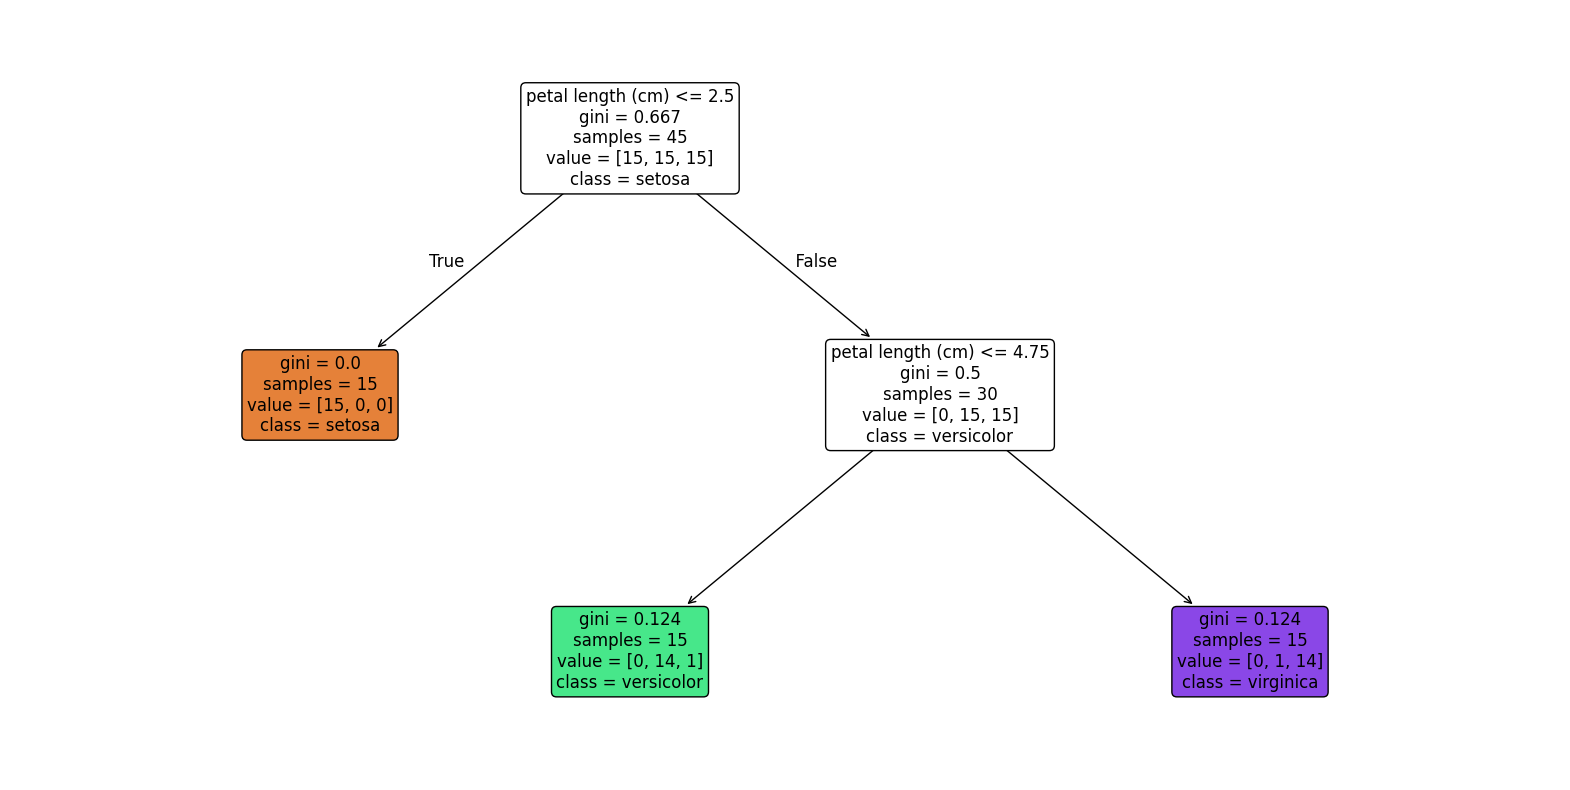

In [15]:
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(
    best_tree,
    filled=True,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    rounded=True,
    fontsize=12
)
plt.show()
